# Cross-sections of the JdF Canyon in all three models

In [19]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm
import pandas as pd

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

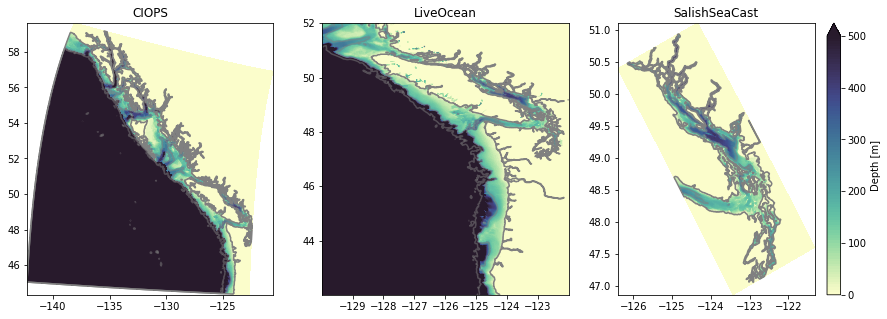

In [3]:
# first lets decide where we want to look at the canyon
fig, ax = plt.subplots(1,3, figsize=(15, 5))

# CIOPS
ciopsgrid = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
ciopsbath = np.array([ciopsgrid.gdepw_1d[0,z] for z in ciopsgrid.mbathy[0,:]])

ax[0].contourf(ciopsgrid.nav_lon, ciopsgrid.nav_lat, ciopsgrid.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax[0].contour(ciopsgrid.nav_lon, ciopsgrid.nav_lat, ciopsgrid.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='gray')
ax[0].contour(ciopsgrid.nav_lon, ciopsgrid.nav_lat, ciopsbath, levels=[200,1000],extend='max', colors='gray', alpha=0.5)
ax[0].set_title("CIOPS")
c = ax[0].contourf(
    ciopsgrid.nav_lon, ciopsgrid.nav_lat, ciopsbath, levels=np.arange(0, 500.1, 5),
    cmap=cm.cm.deep, extend='max', zorder=1,
)


# LiveOcean
logrid = xr.open_dataset("grid.nc")

ax[1].contourf(logrid.lon_rho, logrid.lat_rho, logrid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax[1].contour(logrid.lon_rho, logrid.lat_rho, logrid.mask_rho, levels=[-0.01, 0.01], colors='gray')
ax[1].contour(logrid.lon_rho, logrid.lat_rho,logrid.h, levels=[200, 1000], colors='gray', alpha=0.5)
ax[1].set_title("LiveOcean")
c = ax[1].contourf(
    logrid.lon_rho, logrid.lat_rho, logrid.h, levels=np.arange(0, 500.1, 5),
    cmap=cm.cm.deep, extend='max', zorder=1,
)

# SalishSeaCast
sscgrid = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
sscbathy = xr.open_dataset("/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc", mask_and_scale=False)
ax[2].contourf(sscgrid.nav_lon, sscgrid.nav_lat, sscgrid.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax[2].contour(sscgrid.nav_lon, sscgrid.nav_lat, sscgrid.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='gray')
ax[2].contour(sscgrid.nav_lon, sscgrid.nav_lat, sscbathy.Bathymetry, levels=[200,1000],extend='max', colors='gray', alpha=0.5)
ax[2].set_title("SalishSeaCast")
c = ax[2].contourf(
    sscgrid.nav_lon, sscgrid.nav_lat, sscbathy.Bathymetry, levels=np.arange(0, 500.1, 5),
    cmap=cm.cm.deep, extend='max', zorder=1,
)
fig.colorbar(c,  label='Depth [m]', ticks=[0,100,200,300,400,500])

# silly.. obviously can't plt the canyon in ssc

In [4]:
print(np.mean([find_nearest(logrid.lon_rho[0,:], ciopsgrid.nav_lon[280,625].values),find_nearest(logrid.lon_rho[0,:], ciopsgrid.nav_lon[260,625].values)]))
print(find_nearest(logrid.lat_rho[:,0], ciopsgrid.nav_lat[280,625].values))
print(find_nearest(logrid.lat_rho[:,0], ciopsgrid.nav_lat[260,625].values))
print('\n')

print(np.mean([find_nearest(logrid.lon_rho[0,:], ciopsgrid.nav_lon[238,612].values), find_nearest(logrid.lon_rho[0,:], ciopsgrid.nav_lon[250,612].values)]))
print(find_nearest(logrid.lat_rho[:,0], ciopsgrid.nav_lat[238,612].values))
print(find_nearest(logrid.lat_rho[:,0], ciopsgrid.nav_lat[250,612].values))
print('\n')

print(find_nearest(logrid.lon_rho[0,:], ciopsgrid.nav_lon[235,600].values))
print(find_nearest(logrid.lon_rho[0,:], ciopsgrid.nav_lon[235,610].values))
print(np.mean([find_nearest(logrid.lat_rho[:,0], ciopsgrid.nav_lat[235,610].values),find_nearest(logrid.lat_rho[:,0], ciopsgrid.nav_lat[235,600].values)]))

272.0
967
905


235.0
839
877


207
229
831.5


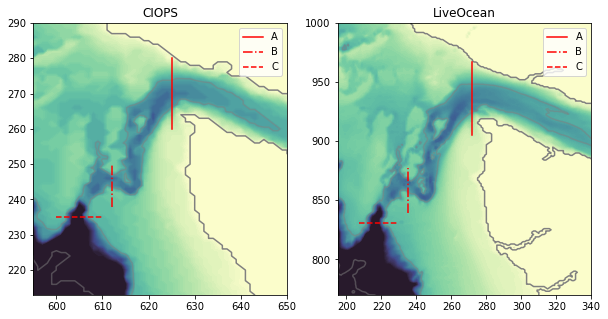

In [5]:
# first lets decide where we want to look at the canyon
fig, ax = plt.subplots(1,2, figsize=(10, 5))

# CIOPS
ciopsgrid = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
ciopsbath = np.array([ciopsgrid.gdepw_1d[0,z] for z in ciopsgrid.mbathy[0,:]])

ax[0].contourf(ciopsgrid.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax[0].contour(ciopsgrid.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='gray')
ax[0].contour(ciopsbath, levels=[200,1000],extend='max', colors='gray', alpha=0.5)
ax[0].set_title("CIOPS")
c = ax[0].contourf(
    ciopsbath, levels=np.arange(0, 500.1, 5),
    cmap=cm.cm.deep, extend='max', zorder=1,
)
ax[0].set_ylim([213,290])
ax[0].set_xlim([595,650])

ax[0].plot([625,625],[260,280],'r',label='A')
ax[0].plot([612,612],[238,250],'r-.',label='B')
ax[0].plot([600,610],[235,235],'r--',label='C')
ax[0].legend()


# LiveOcean
logrid = xr.open_dataset("grid.nc")

ax[1].contourf( logrid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax[1].contour( logrid.mask_rho, levels=[-0.01, 0.01], colors='gray')
ax[1].contour(logrid.h, levels=[200, 1000], colors='gray', alpha=0.5)
ax[1].set_title("LiveOcean")
c = ax[1].contourf(
    logrid.h, levels=np.arange(0, 500.1, 5),
    cmap=cm.cm.deep, extend='max', zorder=1,
)
ax[1].set_ylim([770,1000])
ax[1].set_xlim([195,340])

ax[1].plot([272,272],[905,967],'r',label='A')
ax[1].plot([235,235],[839,877],'r-.',label='B')
ax[1].plot([207,229],[831,831],'r--',label='C')
ax[1].legend()

In [42]:
# can we bring in real bathy?
bathy = pd.concat([pd.read_csv('./NONNA100_4800N12500W.txt',sep='\t'),pd.read_csv('./NONNA100_4800N12600W.txt',sep='\t')],ignore_index=True)
bathy['lat'] = [int((bathy['Lat (DMS)'][i])[:2]) + int((bathy['Lat (DMS)'][i])[3:5])/60 + float((bathy['Lat (DMS)'][i])[6:-1])/3600 for i in range(len(bathy))]
bathy['lon'] = [int((bathy['Long (DMS)'][i])[:3]) + int((bathy['Long (DMS)'][i])[4:6])/60 + float((bathy['Long (DMS)'][i])[7:-1])/3600 for i in range(len(bathy))]

bathy.head()

,Lat (DMS),Long (DMS),Depth (m),Contributor,lat,lon
0,48-23-27.600N,124-29-27.600W,159.26,5026783|3|3|20020516|20020521,48.391,124.491
1,48-23-27.600N,124-29-24.000W,160.65,5026783|3|3|20020516|20020521,48.391,124.490
2,48-23-27.600N,124-29-20.400W,160.13,5026783|3|3|20020516|20020521,48.391,124.489
3,48-23-31.200N,124-29-38.400W,158.00,5026783|3|3|20020516|20020521,48.392,124.494
4,48-23-31.200N,124-29-34.800W,158.82,5026783|3|3|20020516|20020521,48.392,124.493


(400.0, 0.0)

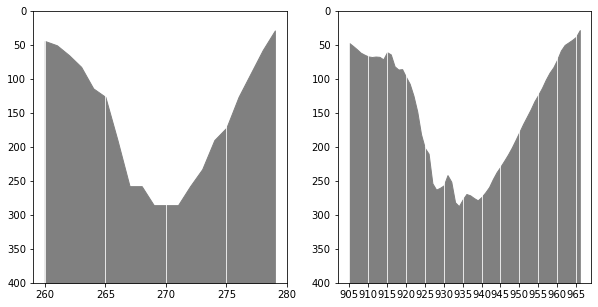

In [6]:
# cross section "A"
fig, ax = plt.subplots(1,2, figsize=(10, 5))
# CIOPS
x, ymin, ymax = 625,260,280
ax[0].fill_between(ciopsgrid.y[ymin:ymax],ciopsbath[ymin:ymax,x], 400, color='gray')
ax[0].set_xticks(np.arange(ymin,ymax+1,5))
ax[0].grid(axis='x',color='w')
ax[0].set_ylim([400,0])

# LiveOcean
x, ymin, ymax = 272,905,967
ax[1].fill_between(logrid.eta_rho[ymin:ymax],logrid.h[ymin:ymax,x], 400, color='gray')
ax[1].set_xticks(np.arange(ymin,ymax+1,5))
ax[1].grid(axis='x',color='w')
ax[1].set_ylim([400,0])


(400.0, 0.0)

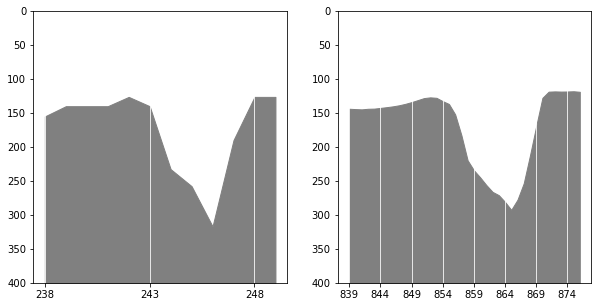

In [7]:
# cross section "B"
fig, ax = plt.subplots(1,2, figsize=(10, 5))
# CIOPS
x, ymin, ymax = 612,238,250
ax[0].fill_between(ciopsgrid.y[ymin:ymax],ciopsbath[ymin:ymax,x], 400, color='gray')
ax[0].set_xticks(np.arange(ymin,ymax+1,5))
ax[0].grid(axis='x',color='w')
ax[0].set_ylim([400,0])

# LiveOcean
x, ymin, ymax = 235,839,877
ax[1].fill_between(logrid.eta_rho[ymin:ymax],logrid.h[ymin:ymax,x], 400, color='gray')
ax[1].set_xticks(np.arange(ymin,ymax+1,5))
ax[1].grid(axis='x',color='w')
ax[1].set_ylim([400,0])

(700.0, 0.0)

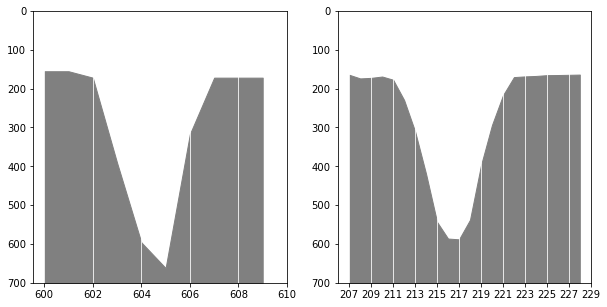

In [8]:
# cross section "B"
fig, ax = plt.subplots(1,2, figsize=(10, 5))
# CIOPS
xmin, xmax, y = 600,610,235
ax[0].fill_between(ciopsgrid.x[xmin:xmax],ciopsbath[y,xmin:xmax], 700, color='gray')
ax[0].set_xticks(np.arange(xmin,xmax+1,2))
ax[0].grid(axis='x',color='w')
ax[0].set_ylim([700,0])

# LiveOcean
xmin, xmax, y = 207,229,831
ax[1].fill_between(logrid.xi_rho[xmin:xmax],logrid.h[y,xmin:xmax], 700, color='gray')
ax[1].set_xticks(np.arange(xmin,xmax+1,2))
ax[1].grid(axis='x',color='w')
ax[1].set_ylim([700,0])